In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
import innomatics

**Reading Dataset**

In [6]:
data = pd.read_csv('./data/bank.csv',delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Checking imbalance or balance dataset**

no     4000
yes     521
Name: y, dtype: int64

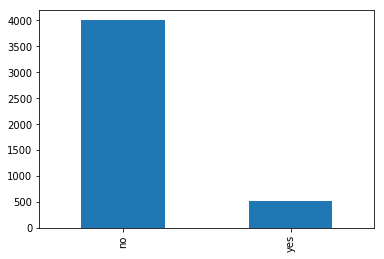

In [7]:
data['y'].value_counts().plot('bar')
data['y'].value_counts()

*From above visualization dataset is clearly imbalanced*
- Hence we need to oversample the dataset

In [8]:
X = data.iloc[:,:-1] # independent
y = data.iloc[:,-1] # dependent

In [9]:
y.replace(['no','yes'],[0,1],inplace=True) # replace categorial to labels

**Creating Dummies**

In [10]:
Xf = pd.get_dummies(X,drop_first=True) # dummies

In [11]:
Xf.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Train-Test Split

In [12]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Xf,y,
                                                 test_size=0.2)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3616, 42), (905, 42), (3616,), (905,))

## Classification Algorithm

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier(n_neighbors=5,
                             metric='minkowski',p=2)

In [16]:
model.fit(x_train,y_train)  # Training 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Evaluation

In [22]:
y_pred = model.predict(x_test)
y_pred_prob= model.predict_proba(x_test)[:,1]# considering probability of 1
y_pred_prob[:10]

array([0. , 0. , 0.2, 0. , 0. , 0.4, 0. , 0.8, 0. , 0. ])

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

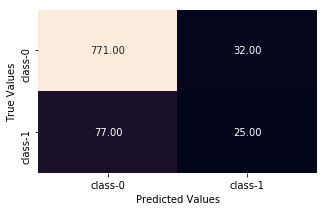

In [24]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))

sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [25]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       803
           1       0.44      0.25      0.31       102

   micro avg       0.88      0.88      0.88       905
   macro avg       0.67      0.60      0.62       905
weighted avg       0.86      0.88      0.86       905



In [26]:
from sklearn.metrics import cohen_kappa_score

In [27]:
cohen_kappa_score(y_test,y_pred)

0.25419794808984864

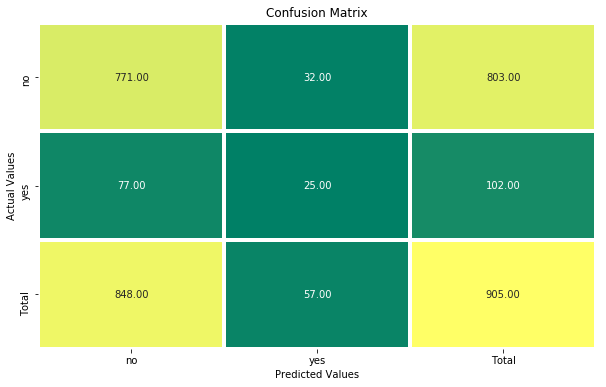

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       803
           1       0.44      0.25      0.31       102

    accuracy                           0.88       905
   macro avg       0.67      0.60      0.62       905
weighted avg       0.86      0.88      0.86       905


************************************Kappa Score************************************


Kappa Score = 0.25419794808984864

******************************Area Under Curve Score******************************


AUC Score = 0.6026237394085903
Number of probabilities to build ROC = 7


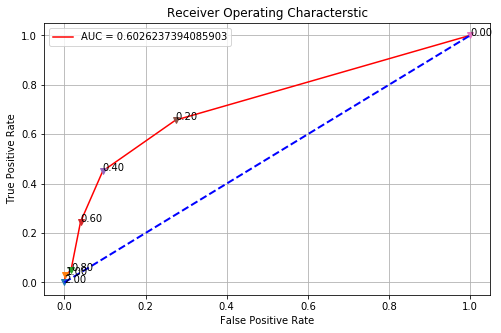

In [15]:
innomatics.classification_metric(y_test,y_pred,y_pred_prob,
                                 ['no','yes'],n=1,verbose=True)

> From above evaluation it can be concluded that TPR = 25% and TNR = 96%, which is clearly indicated that model is biased towards Negative Sample. 
- Even though accuracy of the model 88% which is not consider because data is highly imbalance
- For Imabalance dataset Kappa score will be consider which is equal to 0.25 which is slightly okay scale
- With ROC we can improve TPR. But from ROC with TPR = 80% FPR increase to 60% which predominatly reduces TNR to 40% which is again not a recommended method. As AUC = 0.6 which fall in poor model region.

# Solution for imbalance dataset
## OverSampling
- SMOTE (`S`ynthetic `M`inority `O`versampling `T`echniqu`E`)

~~`pip install --user imbalanced_learn`~~

~~`pip install -U imbalanced_learn`~~

## Install the library 


pip install --user imblearn

In [1]:
import imblearn
from imblearn.over_sampling import SMOTE

In [17]:
x_resample,y_resample = SMOTE(k_neighbors=5).fit_resample(Xf,y)

In [18]:
# saving array's
np.savez('bank_oversample.npz',x_resample,y_resample)

In [19]:
# load data
data_over = np.load('bank_oversample.npz')
data_over.files

['arr_0', 'arr_1']

In [20]:
x_over = data_over['arr_0']
y_over = data_over['arr_1']

1    4000
0    4000
dtype: int64

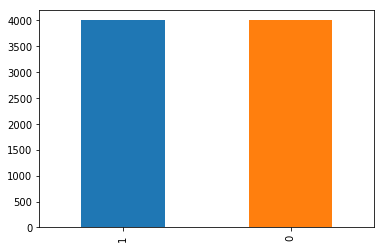

In [21]:
pd.Series(y_over).value_counts().plot('bar')
pd.Series(y_over).value_counts()

## Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x_over,y_over,test_size=0.2)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6400, 42), (1600, 42), (6400,), (1600,))

## Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model_over = KNeighborsClassifier(n_neighbors=5,
                                  metric='minkowski',p=2)

In [26]:
model_over.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Evaluation

In [27]:
y_pred = model_over.predict(x_test)
y_pred_prob= model_over.predict_proba(x_test)[:,1] # considering probability of 1

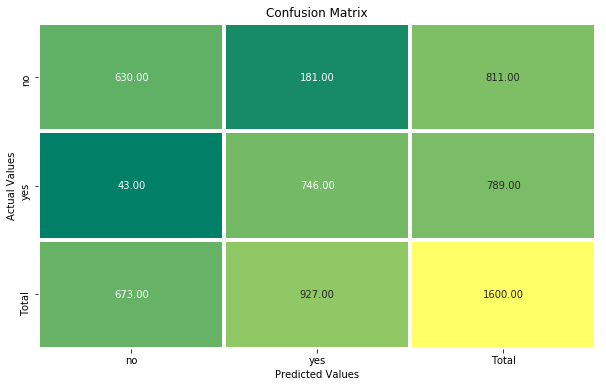

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.78      0.85       811
           1       0.80      0.95      0.87       789

    accuracy                           0.86      1600
   macro avg       0.87      0.86      0.86      1600
weighted avg       0.87      0.86      0.86      1600


************************************Kappa Score************************************


Kappa Score = 0.7206098562980494

******************************Area Under Curve Score******************************


AUC Score = 0.8611596880035133
Number of probabilities to build ROC = 7


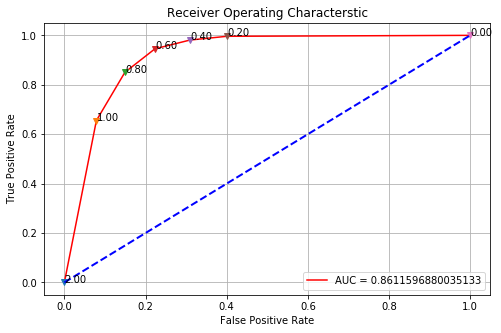

In [28]:
innomatics.classification_metric(y_test,y_pred,
                                 y_pred_prob,['no','yes'],
                                 n=1,verbose=True)

**From ROC 0.8 cutoff probability seems to balance both TPR and FPR (TNR)**

In [29]:
cutoff = innomatics.threshold()

In [30]:
cutoff.th = 0.8

In [31]:
y_pred_class = pd.Series(y_pred_prob).apply(cutoff.predict_threshold)

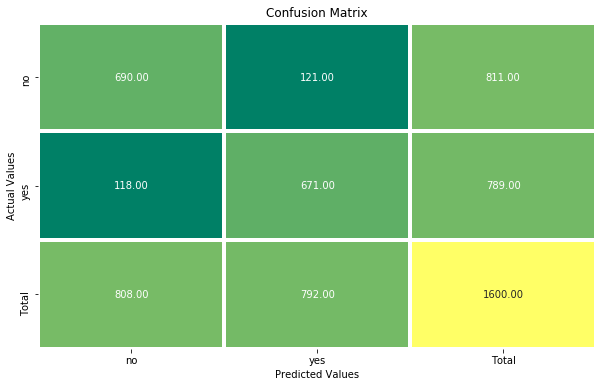

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       811
           1       0.85      0.85      0.85       789

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600


************************************Kappa Score************************************


Kappa Score = 0.7012089162259811

******************************Area Under Curve Score******************************


AUC Score = 0.8506225395738882
Number of probabilities to build ROC = 7


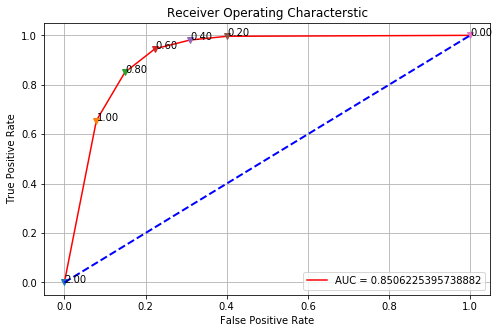

In [32]:
innomatics.classification_metric(y_test,y_pred_class,y_pred_prob,
                                 label=['no','yes'],n=1,verbose=True)

# What could be real time Real Time Accuracy ?

# K-FOLD

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x_over,y_over,test_size=0.2)

In [33]:
np.random.seed(101)
from sklearn.model_selection import KFold

In [66]:
kfold = KFold(n_splits=5,shuffle=False)

In [61]:
# generating ranodom 100 sample
ra = np.random.randn(100)

In [64]:
# extracting 25 sample randomly
ind = np.random.randint(0,100,25)
ind

array([28, 54, 44, 77, 56, 18, 36, 55, 79, 10, 49, 67,  0, 77, 45, 20,  6,
       91, 37, 48, 77, 31, 71, 99, 49])

In [65]:
ra[ind]

array([ 0.80998548, -0.65798862,  1.81167841,  0.52894304,  0.65828182,
        0.61644397,  0.57476994, -0.20952035,  1.29488479,  0.74149851,
        0.10099447,  0.74725209,  0.14771988,  0.52894304,  0.93626116,
        1.83259344, -0.95168049,  0.87066498,  0.74714957, -0.15663886,
        0.52894304, -0.80982088, -0.63200427,  1.8364964 ,  0.10099447])

In [ ]:
cross_validation = []
for train_index,test_index in kfold.split(x_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kf, X_test_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    # bulilding model
    model_cv = KNeighborsClassifier(n_neighbors=5)
    model_cv.fit(X_train_kf,y_train_kf)
    # taking accuracy
    acc = model_cv.score(X_test_kf,y_test_kf)
    cross_validation.append(acc*100)

In [73]:
cross_validation

[84.453125, 83.75, 85.3125, 85.859375, 85.703125]

In [76]:
np.mean(cross_validation), pd.Series(cross_validation).var()

(85.015625, 0.7977294921875)

**With Number of neighbours=5, seems to have low variance and realtime accuracy will be an average of 85.01%**

# Finding best value of k and distance method
## GridSearchCV

In [38]:
np.random.seed(101)
from sklearn.model_selection import GridSearchCV

In [39]:
tuning_parameter = [{'n_neighbors':range(3,20,2),
                     'metric':['canberra','euclidean',
                               'minkowski']}]

In [40]:
# configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
                   tuning_parameter,cv=5,scoring='accuracy')

In [41]:
# searching best parameter
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(3, 20, 2)}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [42]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 3}

In [43]:
clf.best_score_

0.9125

### Bias Variance Trade Off

In [44]:
train_acc = []
test_acc = []
for i in range(1,10):
    model_
    b = KNeighborsClassifier(n_neighbors=i,metric='canberra')
    model_b.fit(x_train,y_train)
    tracc = model_b.score(x_train,y_train)
    teacc = model_b.score(x_test,y_test)
    train_acc.append(tracc)
    test_acc.append(teacc)

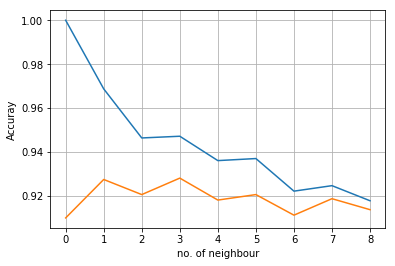

In [45]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel('no. of neighbour')
plt.ylabel('Accuray')
plt.grid()
plt.show()

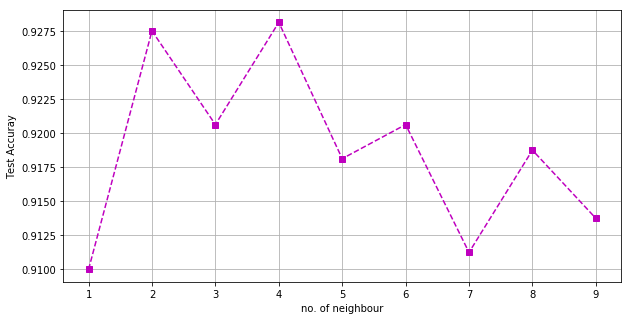

In [56]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,10),test_acc,'ms--')
plt.xlabel('no. of neighbour')
plt.ylabel('Test Accuray')
plt.grid()
plt.show()

****